# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [15]:
# Your code here.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

student_data = pd.DataFrame({'Age': [17, 51,27, 21, 36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

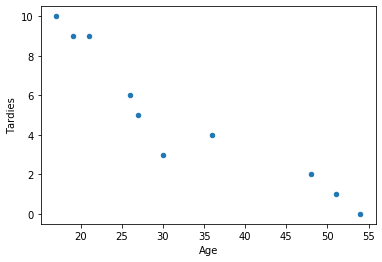

In [14]:
# Your code here.

student_data.plot.scatter('Age', 'Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# the scatterplot indicates a negative correlation btw. age and tardies, onlx the one with age 30 doesnt fit well

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
#correlation:
print(np.corrcoef(student_data['Age'], student_data['Tardies']))

#covariance:
np.cov(student_data['Age'], student_data['Tardies'])

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [ ]:
''' Comments:

Correaltion is the "standardised" covariance.

Here, correlation is -0.9239
the covariance is -45.7

the relation is: corr = cov / (var_age^1/2, var_tardies^1/2)  

var_age = 187
var_tardies = 12.5

'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [56]:
# Your response here.
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# outcome variable: Tartdies
#linear regression, with only one variable, also called OLS (ordinary least square)

Plot your regression model on your scatter plot.

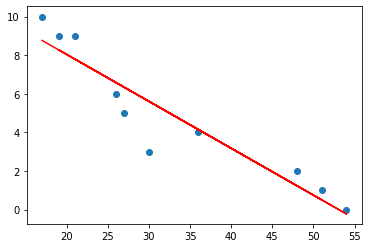

In [59]:
# Your code here.
intercept


Y_pred = intercept + slope * student_data['Age']


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [64]:
# Your response here. 
## Negative correlation, line seems to fit well... this is confirmed by the r_value, which is almost -1

print(r_value)





-0.9391626886887121


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
# Your response here. 
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
pd.DataFrame(np.corrcoef(vehicles))


,0,1,2,3,4,5,6,7,8,9,...,35942,35943,35944,35945,35946,35947,35948,35949,35950,35951
0,1.000000,0.984902,0.998858,0.984957,0.985508,0.985188,0.977004,0.993678,0.985135,0.976940,...,0.936924,0.936836,0.936748,0.936660,0.936571,0.936392,0.936272,0.936216,0.936192,0.943987
1,0.984902,1.000000,0.992033,1.000000,0.998927,0.940628,0.925346,0.959242,0.940524,0.925233,...,0.862433,0.862305,0.862177,0.862049,0.861921,0.861678,0.861510,0.861423,0.861376,0.872812
2,0.998858,0.992033,1.000000,0.992073,0.992311,0.975883,0.965729,0.987188,0.975816,0.965651,...,0.919303,0.919203,0.919104,0.919004,0.918905,0.918712,0.918579,0.918513,0.918480,0.927307
3,0.984957,1.000000,0.992073,1.000000,0.998930,0.940737,0.925467,0.959332,0.940632,0.925353,...,0.862593,0.862466,0.862338,0.862210,0.862082,0.861840,0.861672,0.861585,0.861537,0.872967
4,0.985508,0.998927,0.992311,0.998930,1.000000,0.942859,0.928126,0.960905,0.942757,0.928016,...,0.867499,0.867373,0.867246,0.867120,0.866994,0.866817,0.866673,0.866565,0.866475,0.877787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,0.936392,0.861678,0.918712,0.861840,0.866817,0.982517,0.989545,0.969743,0.982574,0.989587,...,0.999998,0.999998,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,0.999999,0.999748
35948,0.936272,0.861510,0.918579,0.861672,0.866673,0.982448,0.989490,0.969655,0.982505,0.989532,...,0.999997,0.999997,0.999998,0.999998,0.999998,1.000000,1.000000,1.000000,0.999999,0.999741
35949,0.936216,0.861423,0.918513,0.861585,0.866565,0.982425,0.989473,0.969621,0.982482,0.989516,...,0.999997,0.999998,0.999998,0.999998,0.999999,1.000000,1.000000,1.000000,1.000000,0.999737
35950,0.936192,0.861376,0.918480,0.861537,0.866475,0.982425,0.989476,0.969613,0.982482,0.989519,...,0.999998,0.999998,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,1.000000,0.999732


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here. 

from sklearn.linear_model import LinearRegression
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)

Intercept:  769.8882836465834
Coef:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# depends on what is important?  First impression is, that 'Fuel Barrels/Year' is the most important, because its the biggest, but actually we cant say, because it depends on the max-min (var) of the original datas... 

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [41]:
# Your code here.
party = pd.DataFrame({'people_invited': [1,3,4,6,8,9,11,14], 'attends': [1,2,4,4,5,7,8,13]})
party['rel_attends'] = party['attends']/ party['people_invited'] 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

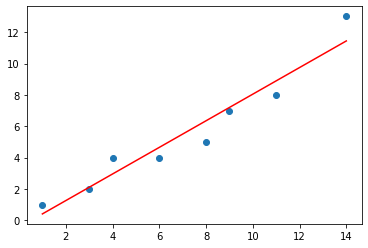

0.9652303546573691


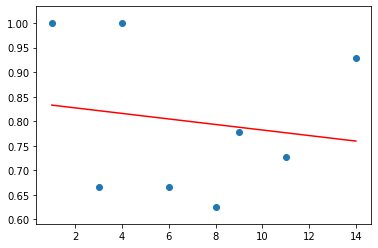

-0.1576961278510599


In [67]:
# Your code here.
from scipy import stats
### plot 1


X = party['people_invited']
Y = party['attends']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * party['people_invited']


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

print(r_value)

### plot 2

X = party['people_invited']
Y = party['rel_attends']


slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * party['people_invited']


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print(r_value)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
## the more people invited, the more people attends, and also the more people do not attend.
## more interesting is actually the relative attendance.. there, you cant see any relationsship

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [54]:
# Your response here. 
#no,....

# but maybe witht he relative attendance we could drop the values with 100% attendance

party2 = party[party.rel_attends != 1]


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

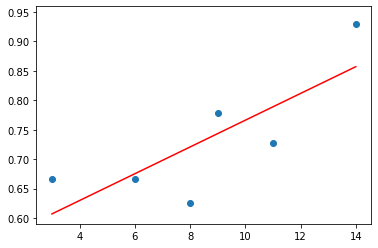

0.7895853370329716

In [68]:
# Your response here. 
#nothing changed, because i 

X = party2['people_invited']
Y = party2['rel_attends']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Y_pred = intercept + slope * party2['people_invited']


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r_value
### better correlation, and the modell fit better (r_value got from 0.15 to 0.79).  but for me, it doesnt make sense to drop this outliers, because its important informatin, that when you invite 1 person, that this most likelay will come, otherwise there is no party:-)  